## Pembuka 

Bismillahirrahmanirrahim

Assalamu'alaikum warahmatullahi wabarakatuh

Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan Hidayah-Nya kepada kita semua. Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan pertama Program Training **Algoritma Machine Learning** Kelas Mahir.

Pada petemuan ini kamu akan belajar:

1.   Algoritma Naive Bayes
2.   Contoh Perhitungan Manual Algoritma Naive Bayes
3.   Naive Bayes Python From Scratch

## Import Modul

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Model Klasifikasi Naive Bayes

Model klasifikasi Naive Bayes merupakan model klasifikasi dengan dasar gagasan Teorema Bayes dengan asumsi semua variabel prediktornya (X) adalah saling independen. Model Naive Bayes mudah untuk dibangun. Model ini tidak memiliki estimasi parameter iteratif yang kompleks yang membuatnya cocok untuk data yang sangat besar. Terlepas dari kesederhanaannya, model klasifikasi ini sering kali bekerja dengan sangat baik dan banyak digunakan karena sering mengungguli metode klasifikasi yang lebih canggih. Contohnya pada klasifikasi sentimen pada dataset teks, klasifikasi sentimen pada dataset teks, klasifikasi email spam, dan klasifikasi dokumen.

## Algoritma Naive Bayes

Teorema Bayes menyajikan cara untuk menghitung probabilitas bersyarat (posterior) $P(Y=y|X=(x_1,x_2,...,x_n))$ dari $P(Y=y),P(X=(x_1,x_2,..,x_n))$ dan $P(X=(x_1,x_2,...,x_n)|Y=y)$. Model klasifikasi Naive Bayes mengasumsikan bahwa pengaruh suatu variabel prediktor $x$ pada kelas tertentu $c$ tidak bergantung pada nilai-nilai prediktornya lainnya. Asumsi ini disebut sebagai _class contional independence_

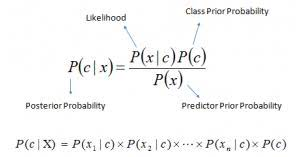

1.    $P(Y|X)$ adalah probabilitas bersyarat (posterior) dari kelas (target) dengan suatu prediktor yang diketahui (atribut)
2.    $P(Y)$ adalah probabilitas prior dari kelas
3.    $P(X|Y)$ adalah likelihood yang merupakan probabilitas prediktor dengan kelas yang diketahui
4.    $P(X)$ adalah probabilitas prior dari prediktor (atribut)

## Penghitungan Manual Metode Klasifikasi Naive Bayes Data Categorical

Misal kita memiliki dataset sebagai berikut:

In [37]:
df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
                  'x_2':[0,1,2,0,2,1,2,0,1,0],
                  'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


Mari kita akan menghitung $P(Y=0|X=(0,2))$ dan $P(Y=1|X=(0,2))$

Langkah-langkah adalah sebagai berikut:
1.    Menghitung probabilitas prior
2.    Menghitung probabilitas Likelihood
3.    Mengalikan probabilitas likelihood dan probabilitas prior

Berikut contohnya
1)    Menghitung probabilitas prior:
$$
P(Y=0)=\frac{Jumlah Y = 0}{Jumlah Y = 0 + Jumlah Y = 1} = \frac{6}{10}\\
P(Y=1)=\frac{Jumlah Y = 1}{Jumlah Y = 0 + Jumlah Y = 1} = \frac{4}{10}
$$

2)    Menghitung probabilitas prior:
$$
P(X=(0,2)|Y=0)=\frac{Jumlah X = (0,2)}{Jumlah Y = 0} = \frac{0}{6}=6\\
P(X=(0,2)|Y=1)=\frac{Jumlah X = (0,2)}{Jumlah Y = 1} = \frac{1}{10}
$$

_Cara lain adalah dengan menggunakan teorema Bayes_

$$
P(X=(0,2)|Y=0)=P(X_1=0|Y=0)*P(X_2=2|Y=1)=\frac{1}{6}*\frac{1}{6} = \frac{1}{36}\\
P(X=(0,2)|Y=1)=P(X_1=0|Y=1)*P(X_2=2|Y=1)=\frac{3}{4}*\frac{2}{4} = \frac{6}{16}\\
$$

3)    Mengalikan probabilitas likelihood dan probabilitas prior:
$$
P(Y=0)|X=(0,2))==>\frac{6}{10}*\frac{6}{36} = \frac{24}{160}=0.10\\
P(Y=1|X=(0,2))=\frac{4}{10}*\frac{6}{16} = \frac{24}{160}=0.15
$$

Dari hasil terakhir di atas diperoleh bahwa probabilitas muncul kelas $y=1$ dengan syarat $x=(0,2)$ adalah lebih tinggi maka untuk input $x=(0,2)$ hasil klasifikasi adalah $y=1$

## Implementasi pada Python

**Import Library**

In [38]:
import pandas as pd
import numpy as np

In [39]:
# Data Frame Input

df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
                  'x_2':[0,1,2,0,2,1,2,0,1,0],
                  'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


In [40]:
# Naive Bayes untuk Data Categorial

def prob_prior(df,Y):
    label_kelas = sorted(list(df[Y].unique()))
    prior=[]
    for i in label_kelas:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [41]:
def likelihood_categorical(df, nama_var, nilai_var, Y, label):
    feat = list(df.columns)
    df=df[df[Y]==label]
    p_x_dgsyrt_y = len(df[df[nama_var]==nilai_var])/len(df)
    return p_x_dgsyrt_y

In [42]:
def naive_bayes_categorical(df,X,Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]
    
    # menghitung prob prior
    prior = prob_prior(df,Y)
    
    Y_pred = []
    # Looping pada setiap baris data
    for x in X:
        # Menghitung likelihood 
        labels=sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_categorical(df, nama_kolom[i], x[i], Y, labels[i])
                
        #menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j]=likelihood[j]*prior[j]
        
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [43]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
Y_pred = naive_bayes_categorical(df, X=X, Y="y")

In [44]:
X

array([[0, 0],
       [0, 1],
       [1, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 2],
       [2, 0],
       [2, 1],
       [1, 0]], dtype=int64)

In [45]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
Y

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Metode Klasifikasi Naive Bayes Data Numerik

Misal kita memiliki dataset sebagai berikut:

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/hfzhrahma/Kelas-Mahir/main/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Jika kita akan menghitung data numerik, maka ada dua cara, pertama kita ubah ke data categorical, atau dengan pendekatan model distribusi. Artinya kita melakukan fitting dara ke sebuah distribusi standar (misal: distribusi normal).

$$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

dimana $\sigma$ adalah standar deviasi dan $\mu$ adalah mean

## Implementasi pada Python

**Import Library**

In [48]:
import pandas as pd
import numpy as np

**DataFrame Input**

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/hfzhrahma/Kelas-Mahir/main/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


**EDA for Distribution**

In [50]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


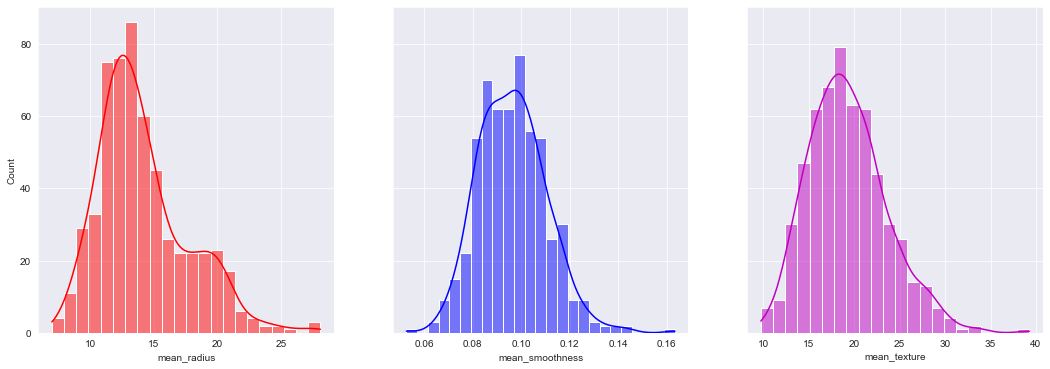

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True, color='m')
plt.show()

In [52]:
def prob_prior(df,Y):
    label_kelas=sorted(list(df[Y].unique()))
    prior=[]
    for i in label_kelas:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [53]:
def likelihood_gaussian(df, nama_var, nilai_var, Y, label):
    feat = list(df.columns)
    df=df[df[Y]==label]
    mean, std = df[nama_var].mean(), df[nama_var].std()
    p_x_dgsyrt_y = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-((nilai_var-mean)**2/(2 * std**2)))
    return p_x_dgsyrt_y

In [58]:
def naive_bayes_gaussian(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]

    # menghitung prob prior
    prior = prob_prior(df, Y)

    Y_pred = []
    # looping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_gaussian(df, nama_kolom[i], x[i], Y, labels[j])

        # menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.9649122807017544
